In [3]:
import pandas as pd
import autoplier.model as ap
import mygene
import json
import csv
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, average_precision_score
import numpy as np

In [4]:
gtex = pd.read_csv("GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct", skiprows = 2,sep = "\t" ,header = 0)

In [5]:
gtex = gtex.set_index("Name")
gtex = gtex.drop("Description", axis = 1)
gtex.head()

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
ENSG00000227232.5,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,10.04,12.50000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
ENSG00000278267.1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
ENSG00000243485.5,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,0.00,0.06265,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
ENSG00000237613.2,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,0.00,0.00000,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


In [6]:
metadata = pd.read_csv("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep = "\t", index_col = "SAMPID")

In [7]:
metadata

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-6WBT7,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10a-SM-AHZ7F,NaN,"B1, A1",NaN,NaN,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10b-SM-CYKQ8,NaN,"B1, A1",NaN,7.2,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,BP-42319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K-562-SM-E9EZC,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26289400.0,27814300.0,0.002441,26121600.0,49.8400,0.006370,0.995167,NaN,0.0,50.2621
K-562-SM-E9EZI,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26653800.0,28341700.0,0.002336,26553400.0,49.9056,0.006806,0.994802,NaN,0.0,50.2046
K-562-SM-E9EZO,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,14317500.0,15168000.0,0.001731,14163500.0,49.7298,0.006662,0.994935,NaN,0.0,50.2412


In [8]:
metadata["SMTS"].value_counts()

Blood              3480
Brain              3326
Skin               2014
Esophagus          1582
Blood Vessel       1473
Adipose Tissue     1327
Heart              1141
Muscle             1132
Lung                867
Colon               821
Thyroid             812
Nerve               722
Breast              480
Testis              406
Stomach             381
Pancreas            360
Pituitary           301
Adrenal Gland       275
Prostate            262
Spleen              260
Liver               251
Bone Marrow         217
Ovary               195
Small Intestine     193
Salivary Gland      181
Vagina              173
Uterus              166
Kidney              104
Bladder              21
Cervix Uteri         19
Fallopian Tube        9
Name: SMTS, dtype: int64

In [9]:
pathway_genes = []
pathway_names = []

with open('c2.all.v7.5.1.entrez.gmt', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        pathway_names += [row[0]]
        pathway_genes += [row[2:]]

mlb = MultiLabelBinarizer()
pathways = pd.DataFrame(mlb.fit_transform(pathway_genes), index = pathway_names, columns = mlb.classes_)

mg = mygene.MyGeneInfo()
genes = pathways.columns.tolist()
info = mg.getgenes(genes, fields="ensembl")

not_in_db = []
rename = {}
for x in info:
    if("ensembl" in x):
        y = x["ensembl"]
        if(type(y) == list):
            y = y[0]
        rename[x["query"]] = y["gene"]
    else:
        not_in_db += [x["query"]]

pathways = pathways.drop(columns = not_in_db)
pathways = pathways.rename(columns=rename)
pathways = pathways.groupby(level = 0, axis = 1).first()
pathways

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-21728...done.


,126231,55872,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000288705,ENSG00000288722,ENSG00000288825,ENSG00000288859,ENSG00000288905,ENSG00000288907,ENSG00000288920,ENSG00000289048,ENSG00000289313,ENSG00000289685
CORONEL_RFX7_DIRECT_TARGETS_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_DN,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA_MMP_CYTOKINE_CONNECTION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PROGRAMMED_CELL_DEATH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PTEN_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_REG_CASCADE_OF_CYCLIN_EXPR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
gtex.index = [i.split(".")[0] for i in gtex.index.tolist()]
gtex = gtex[gtex.index.isin(pathways.columns)]
gtex = gtex[~gtex.index.duplicated(keep='first')]
gtex = gtex + 1
gtex = gtex.transform(lambda x: np.log(x))


In [11]:
pathways = pathways.T[pathways.columns.isin(gtex.index)].T

In [12]:
# Autoplier callbacks
callbacks = [
        #early stopping - to mitigate overfitting
        EarlyStopping(patience=100, monitor='val_loss'),
        #monitor umatrix sparsity
        ]

In [13]:
def train_autoplier(X_train,X_test, pathways, seed, n_LVs, regval = 1.20E-7 ):
    ap.set_seed_(seed)
    model = ap.autoPLIER(n_LVs, regval = regval,learning_rate= 0.000156)
    model.fit(X_train, pathways, verbose=0, batch_size = None, callbacks = callbacks)
    Z_test = model.transform(X_test, pathways)
    Z_train = model.transform(X_train, pathways)
    print(ap.sparsity_epsilon(model.components_decomposition_, 0))
    
    return Z_train, Z_test

In [14]:
metadata = metadata[metadata.index.isin(gtex.columns)]

In [15]:
tissue_types = metadata["SMTS"].unique()

In [16]:
metadata["SMTS"]

SAMPID
GTEX-1117F-0226-SM-5GZZ7    Adipose Tissue
GTEX-1117F-0426-SM-5EGHI            Muscle
GTEX-1117F-0526-SM-5EGHJ      Blood Vessel
GTEX-1117F-0626-SM-5N9CS      Blood Vessel
GTEX-1117F-0726-SM-5GIEN             Heart
                                 ...      
GTEX-ZZPU-2126-SM-5EGIU              Ovary
GTEX-ZZPU-2226-SM-5EGIV             Vagina
GTEX-ZZPU-2426-SM-5E44I       Blood Vessel
GTEX-ZZPU-2626-SM-5E45Y             Muscle
GTEX-ZZPU-2726-SM-5NQ8O     Adipose Tissue
Name: SMTS, Length: 17382, dtype: object

In [75]:
def train_classifiers(train_target_full, test_target_full, train_data, test_data):
    
    test_precision = []
    test_recall = []
    aps = []
    fscores = []
    successful_celltypes = []
    unsuccessful_celltypes = []
    for tissue_type in tissue_types:
        
        
        
        train_target = train_target_full == str(tissue_type)
        test_target = test_target_full == str(tissue_type)
        
        
        if(1 in train_target.values and 1 in test_target.values and 0 in train_target.values and 0 in test_target.values):
        # lasso penalty

            clf = LogisticRegression(solver = "liblinear",penalty = "l2",random_state=111, max_iter = 1000)

            clf.fit(train_data, train_target)
            target_pred = clf.predict(test_data)
            target_probs = clf.predict_proba(test_data)[:,1]
            test_pr = average_precision_score(test_target, target_probs)
            test_precision += [precision_score(test_target, target_pred)]
            test_recall += [recall_score(test_target, target_pred)]
            aps += [average_precision_score(test_target, target_probs)]
            fscores += [fscore(test_precision[-1], test_recall[-1])]
            
            
            successful_celltypes += [tissue_type]
        else:
            unsuccessful_celltypes += [tissue_type]

    p = np.mean(test_precision)
    r = np.mean(test_recall)
    f= np.mean(fscores)
    f_micro = fscore(p, r) 
    ap = np.mean(aps)
    sd_f = np.std(f)
    sd_ap = np.std(aps)
    report = pd.DataFrame(list(zip(test_precision, test_recall, aps, fscores)), columns = ["precision",
             "recall","Average Precision","F1 score"], index = successful_celltypes)
    return(report)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(gtex.T, metadata["SMTS"], test_size=0.33, random_state=111)

In [19]:
# fscore metric used to evaluate classifiers
def fscore(p, r):
    denom = p + r or 1

    return 2*(p * r) / denom

In [20]:
X_train

,ENSG00000186092,ENSG00000228794,ENSG00000225880,ENSG00000230368,ENSG00000234711,ENSG00000223764,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000210184,ENSG00000198786,ENSG00000198695,ENSG00000198727
GTEX-14E6D-1026-SM-5S2RS,0.000000,2.237727,3.058237,0.526915,0.513961,1.781036,1.427436,4.063370,3.049747,1.060910,...,9.457279,9.938420,9.850140,9.185843,8.815964,9.649305,0.000000,8.133294,7.638680,9.237080
GTEX-146FR-1826-SM-5QGPF,0.205875,1.892509,1.319353,0.260208,0.494574,0.618478,0.598287,3.810655,2.526528,0.528744,...,10.236776,10.722188,10.539562,10.177742,9.836867,10.592150,0.465493,8.976389,9.173780,10.379442
GTEX-1HCU8-0726-SM-ADEIR,0.140979,1.799893,1.696533,0.024322,0.000000,0.371839,0.216079,4.082778,2.127398,0.702107,...,10.172789,10.635639,10.795096,9.876168,10.077063,10.738373,0.000000,8.296796,7.988543,10.213946
GTEX-13X6I-0011-R10a-SM-5PNWI,0.419368,2.255703,1.009417,0.127073,0.144533,0.187806,0.379053,3.762594,2.117339,0.106250,...,10.241780,10.794891,10.869730,9.824498,10.002020,10.608341,0.432042,8.992060,8.925321,10.260847
GTEX-RU72-1226-SM-2TF6N,0.067565,2.796061,2.238686,0.086985,0.210828,3.427515,3.014554,4.209309,2.129303,0.681833,...,9.689118,10.118639,10.060534,9.122711,9.379323,10.273705,0.736207,9.118115,9.511259,9.642188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-1CB4H-0126-SM-7IGN2,0.000000,1.741693,2.800933,0.042101,0.036351,0.847155,0.736207,4.238878,3.162517,1.026042,...,9.561772,10.102379,10.414243,9.651880,9.099967,9.968385,0.000000,7.768110,7.297768,9.428753
GTEX-14AS3-1026-SM-5TDD7,0.047923,2.384534,1.816615,0.031421,0.198687,1.080788,1.946767,4.212572,3.103689,0.234360,...,9.738082,10.351405,10.295563,9.573663,9.667829,10.458263,0.567471,8.641532,8.793157,10.088763
GTEX-14PJ6-1226-SM-6LLHJ,0.129448,2.146516,1.404380,0.058184,0.000000,1.081466,0.782073,3.921577,2.369683,0.527034,...,9.289244,9.738672,9.785886,9.538996,8.718337,9.488048,0.540520,8.650675,9.245804,9.392745
GTEX-1J8Q3-0126-SM-C1YSI,0.000000,1.948478,2.427454,0.065666,0.256346,3.132882,2.626840,4.208268,3.232384,1.270884,...,9.636327,10.105244,10.205479,9.124456,9.344084,10.160491,0.594486,8.491670,8.715880,9.660843


In [21]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [85]:
model_nmf = NMF(n_components=130, init='random', random_state=111, max_iter=2000)

In [86]:
model_PCA = PCA(n_components=130, random_state = 111)

In [87]:
model_AP = ap.autoPLIER(130, regval = 1.20E-7, learning_rate= 0.000156)
ap.set_seed_(111)

In [88]:
def sparsity(z):
    s = (np.sum((z == 0).astype(int)).sum()) / float(z.size)
    return s

In [89]:
W_train = model_nmf.fit_transform(X_train)
W_test = model_nmf.transform(X_test)
PCA_train = model_PCA.fit_transform(X_train)
PCA_test = model_PCA.transform(X_test)
model_AP.fit(X_train, pathways, verbose=1, batch_size = None, callbacks = callbacks)


Epoch 1/2000
255/255 [==============================] - 2s 9ms/step - loss: 5174934.0000 - magz: 54312300544.0000 - val_loss: 301122.5312 - val_magz: 19158798336.0000
Epoch 2/2000
255/255 [==============================] - 2s 9ms/step - loss: 135771.5938 - magz: 13715161088.0000 - val_loss: 56122.5039 - val_magz: 10132894720.0000
Epoch 3/2000
255/255 [==============================] - 2s 8ms/step - loss: 33321.4219 - magz: 8605440000.0000 - val_loss: 18848.9922 - val_magz: 7363371008.0000
Epoch 4/2000
255/255 [==============================] - 2s 8ms/step - loss: 12565.5928 - magz: 6729772544.0000 - val_loss: 8051.7012 - val_magz: 6134188544.0000
Epoch 5/2000
255/255 [==============================] - 2s 8ms/step - loss: 5685.5786 - magz: 5819659264.0000 - val_loss: 3875.0195 - val_magz: 5479290368.0000
Epoch 6/2000
255/255 [==============================] - 2s 8ms/step - loss: 2822.3357 - magz: 5307835904.0000 - val_loss: 1988.0067 - val_magz: 5089522176.0000
Epoch 7/2000
255/255 [===

Epoch 53/2000
255/255 [==============================] - 2s 8ms/step - loss: 42.0187 - magz: 4205182720.0000 - val_loss: 41.1846 - val_magz: 4147073280.0000
Epoch 54/2000
255/255 [==============================] - 2s 9ms/step - loss: 41.6280 - magz: 4158282496.0000 - val_loss: 41.1177 - val_magz: 4108383232.0000
Epoch 55/2000
255/255 [==============================] - 2s 8ms/step - loss: 42.0631 - magz: 4105488896.0000 - val_loss: 42.5293 - val_magz: 4042144256.0000
Epoch 56/2000
255/255 [==============================] - 2s 8ms/step - loss: 41.8240 - magz: 4042274560.0000 - val_loss: 40.9987 - val_magz: 3981707520.0000
Epoch 57/2000
255/255 [==============================] - 2s 8ms/step - loss: 41.9227 - magz: 3971259392.0000 - val_loss: 41.2862 - val_magz: 3912286464.0000
Epoch 58/2000
255/255 [==============================] - 2s 8ms/step - loss: 41.9352 - magz: 3897433600.0000 - val_loss: 40.3904 - val_magz: 3829221888.0000
Epoch 59/2000
255/255 [==============================] - 2

255/255 [==============================] - 2s 8ms/step - loss: 22.6405 - magz: 3199277568.0000 - val_loss: 22.1739 - val_magz: 3137549824.0000
Epoch 106/2000
255/255 [==============================] - 2s 9ms/step - loss: 22.4443 - magz: 3145292288.0000 - val_loss: 23.8271 - val_magz: 3131252480.0000
Epoch 107/2000
255/255 [==============================] - 2s 8ms/step - loss: 27.4328 - magz: 3237069568.0000 - val_loss: 22.2550 - val_magz: 3188236032.0000
Epoch 108/2000
255/255 [==============================] - 2s 8ms/step - loss: 22.0041 - magz: 3192287488.0000 - val_loss: 22.1002 - val_magz: 3142822144.0000
Epoch 109/2000
255/255 [==============================] - 2s 8ms/step - loss: 24.7610 - magz: 3149985280.0000 - val_loss: 23.7546 - val_magz: 3210389504.0000
Epoch 110/2000
255/255 [==============================] - 2s 8ms/step - loss: 22.2627 - magz: 3187085056.0000 - val_loss: 21.6972 - val_magz: 3134496000.0000
Epoch 111/2000
255/255 [==============================] - 2s 8ms/st

Epoch 157/2000
255/255 [==============================] - 2s 8ms/step - loss: 18.8515 - magz: 3140382976.0000 - val_loss: 18.2336 - val_magz: 3096047360.0000
Epoch 158/2000
255/255 [==============================] - 2s 9ms/step - loss: 20.3033 - magz: 3136901888.0000 - val_loss: 18.8554 - val_magz: 3116283904.0000
Epoch 159/2000
255/255 [==============================] - 2s 8ms/step - loss: 18.5175 - magz: 3106334976.0000 - val_loss: 132.0040 - val_magz: 3271014656.0000
Epoch 160/2000
255/255 [==============================] - 2s 8ms/step - loss: 28.0211 - magz: 3298433536.0000 - val_loss: 18.6275 - val_magz: 3250352640.0000
Epoch 161/2000
255/255 [==============================] - 2s 8ms/step - loss: 18.3209 - magz: 3257862400.0000 - val_loss: 18.7809 - val_magz: 3196891904.0000
Epoch 162/2000
255/255 [==============================] - 2s 8ms/step - loss: 18.4686 - magz: 3205673472.0000 - val_loss: 18.3528 - val_magz: 3161925632.0000
Epoch 163/2000
255/255 [===========================

Epoch 209/2000
255/255 [==============================] - 2s 8ms/step - loss: 19.7276 - magz: 3355685632.0000 - val_loss: 16.7495 - val_magz: 3314287872.0000
Epoch 210/2000
255/255 [==============================] - 2s 9ms/step - loss: 25.9836 - magz: 3371069184.0000 - val_loss: 16.9013 - val_magz: 3472688384.0000
Epoch 211/2000
255/255 [==============================] - 2s 8ms/step - loss: 16.6629 - magz: 3470955776.0000 - val_loss: 16.6884 - val_magz: 3422852096.0000
Epoch 212/2000
255/255 [==============================] - 2s 8ms/step - loss: 16.5283 - magz: 3419688704.0000 - val_loss: 16.9351 - val_magz: 3358232576.0000
Epoch 213/2000
255/255 [==============================] - 2s 8ms/step - loss: 16.7889 - magz: 3371651584.0000 - val_loss: 23.0430 - val_magz: 3377867776.0000
Epoch 214/2000
255/255 [==============================] - 2s 8ms/step - loss: 17.0230 - magz: 3339997952.0000 - val_loss: 18.1847 - val_magz: 3328627456.0000
Epoch 215/2000
255/255 [============================

Epoch 261/2000
255/255 [==============================] - 2s 8ms/step - loss: 24.2237 - magz: 3669664000.0000 - val_loss: 15.7800 - val_magz: 3664855296.0000
Epoch 262/2000
255/255 [==============================] - 2s 9ms/step - loss: 15.4604 - magz: 3670580224.0000 - val_loss: 15.4499 - val_magz: 3622048768.0000
Epoch 263/2000
255/255 [==============================] - 2s 8ms/step - loss: 15.3447 - magz: 3619646976.0000 - val_loss: 15.4395 - val_magz: 3570024704.0000
Epoch 264/2000
255/255 [==============================] - 2s 8ms/step - loss: 15.3104 - magz: 3572390400.0000 - val_loss: 15.4514 - val_magz: 3527646976.0000
Epoch 265/2000
255/255 [==============================] - 2s 8ms/step - loss: 26.0591 - magz: 3557544448.0000 - val_loss: 17.6158 - val_magz: 3698533632.0000
Epoch 266/2000
255/255 [==============================] - 2s 8ms/step - loss: 15.6236 - magz: 3737180160.0000 - val_loss: 15.7319 - val_magz: 3688520448.0000
Epoch 267/2000
255/255 [============================

Epoch 313/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.5417 - magz: 3716660992.0000 - val_loss: 14.8121 - val_magz: 3672166400.0000
Epoch 314/2000
255/255 [==============================] - 2s 9ms/step - loss: 23.6238 - magz: 3727010560.0000 - val_loss: 15.5419 - val_magz: 3835439616.0000
Epoch 315/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.6926 - magz: 3819181568.0000 - val_loss: 14.7540 - val_magz: 3769992448.0000
Epoch 316/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.5243 - magz: 3767509760.0000 - val_loss: 14.6384 - val_magz: 3719147264.0000
Epoch 317/2000
255/255 [==============================] - 2s 9ms/step - loss: 21.6232 - magz: 3783450880.0000 - val_loss: 14.9108 - val_magz: 3822913280.0000
Epoch 318/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.5780 - magz: 3820044800.0000 - val_loss: 14.7234 - val_magz: 3771908608.0000
Epoch 319/2000
255/255 [============================

Epoch 365/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.0854 - magz: 3888136704.0000 - val_loss: 14.0214 - val_magz: 3827515392.0000
Epoch 366/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.9113 - magz: 3837470976.0000 - val_loss: 13.9025 - val_magz: 3784902400.0000
Epoch 367/2000
255/255 [==============================] - 2s 9ms/step - loss: 22.0884 - magz: 3802567424.0000 - val_loss: 14.4388 - val_magz: 3893446144.0000
Epoch 368/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.2188 - magz: 3914111488.0000 - val_loss: 14.2578 - val_magz: 3851566336.0000
Epoch 369/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.9082 - magz: 3861636864.0000 - val_loss: 14.0699 - val_magz: 3808890880.0000
Epoch 370/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.7999 - magz: 3815006208.0000 - val_loss: 13.9952 - val_magz: 3760579584.0000
Epoch 371/2000
255/255 [============================

Epoch 417/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.4294 - magz: 3952019712.0000 - val_loss: 13.8927 - val_magz: 3910924288.0000
Epoch 418/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.3559 - magz: 3907125504.0000 - val_loss: 13.5989 - val_magz: 3852739584.0000
Epoch 419/2000
255/255 [==============================] - 2s 9ms/step - loss: 19.8106 - magz: 3930712832.0000 - val_loss: 14.2705 - val_magz: 3969473792.0000
Epoch 420/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.5841 - magz: 3976030720.0000 - val_loss: 13.5106 - val_magz: 3919120640.0000
Epoch 421/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.3834 - magz: 3923715584.0000 - val_loss: 13.4413 - val_magz: 3868349440.0000
Epoch 422/2000
255/255 [==============================] - 2s 9ms/step - loss: 24.1352 - magz: 3899869952.0000 - val_loss: 14.3250 - val_magz: 4022113536.0000
Epoch 423/2000
255/255 [============================

Epoch 469/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.9647 - magz: 3916807168.0000 - val_loss: 13.4763 - val_magz: 3879526144.0000
Epoch 470/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.9919 - magz: 3882385920.0000 - val_loss: 13.0333 - val_magz: 3835355648.0000
Epoch 471/2000
255/255 [==============================] - 2s 9ms/step - loss: 24.6060 - magz: 4037015808.0000 - val_loss: 13.5784 - val_magz: 4020118016.0000
Epoch 472/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.1028 - magz: 4034566656.0000 - val_loss: 13.0322 - val_magz: 3981912832.0000
Epoch 473/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.0047 - magz: 3986183168.0000 - val_loss: 12.9920 - val_magz: 3936776960.0000
Epoch 474/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.0489 - magz: 3941159424.0000 - val_loss: 14.6041 - val_magz: 3866040320.0000
Epoch 475/2000
255/255 [============================

Epoch 521/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.8275 - magz: 4044286208.0000 - val_loss: 12.7567 - val_magz: 3987207680.0000
Epoch 522/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.6350 - magz: 3997625344.0000 - val_loss: 12.6429 - val_magz: 3948869120.0000
Epoch 523/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.9120 - magz: 3981400832.0000 - val_loss: 13.0597 - val_magz: 4047853056.0000
Epoch 524/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.8953 - magz: 4035872000.0000 - val_loss: 12.6913 - val_magz: 3984575488.0000
Epoch 525/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.6861 - magz: 3987028992.0000 - val_loss: 12.9374 - val_magz: 3945294080.0000
Epoch 526/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.6235 - magz: 3948336128.0000 - val_loss: 12.6478 - val_magz: 3898805504.0000
Epoch 527/2000
255/255 [============================

Epoch 573/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.4224 - magz: 4016809728.0000 - val_loss: 12.6017 - val_magz: 3969620992.0000
Epoch 574/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.3729 - magz: 3974663424.0000 - val_loss: 13.6607 - val_magz: 3948079872.0000
Epoch 575/2000
255/255 [==============================] - 2s 9ms/step - loss: 19.4000 - magz: 4044705024.0000 - val_loss: 12.7578 - val_magz: 4042530048.0000
Epoch 576/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.5192 - magz: 4043941632.0000 - val_loss: 12.6252 - val_magz: 3994490624.0000
Epoch 577/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.4813 - magz: 3998300416.0000 - val_loss: 12.5600 - val_magz: 3949919488.0000
Epoch 578/2000
255/255 [==============================] - 2s 9ms/step - loss: 19.6066 - magz: 3994117632.0000 - val_loss: 12.9632 - val_magz: 4064733440.0000
Epoch 579/2000
255/255 [============================

Epoch 625/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.0973 - magz: 3985981440.0000 - val_loss: 12.1352 - val_magz: 3936787968.0000
Epoch 626/2000
255/255 [==============================] - 2s 9ms/step - loss: 20.3272 - magz: 3991656704.0000 - val_loss: 13.5686 - val_magz: 4096746496.0000
Epoch 627/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.3970 - magz: 4072678912.0000 - val_loss: 12.2928 - val_magz: 4019763200.0000
Epoch 628/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.1574 - magz: 4023118848.0000 - val_loss: 12.3231 - val_magz: 3969550336.0000
Epoch 629/2000
255/255 [==============================] - 2s 9ms/step - loss: 18.3033 - magz: 3991506432.0000 - val_loss: 16.0136 - val_magz: 4097131008.0000
Epoch 630/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.4936 - magz: 4075298304.0000 - val_loss: 12.6204 - val_magz: 4004081664.0000
Epoch 631/2000
255/255 [============================

Epoch 677/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.0020 - magz: 3936886016.0000 - val_loss: 12.0228 - val_magz: 3888764672.0000
Epoch 678/2000
255/255 [==============================] - 2s 9ms/step - loss: 20.5236 - magz: 3994541056.0000 - val_loss: 12.3922 - val_magz: 4046840832.0000
Epoch 679/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.1587 - magz: 4043983616.0000 - val_loss: 12.4080 - val_magz: 3995314176.0000
Epoch 680/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.9557 - magz: 3996254208.0000 - val_loss: 12.0462 - val_magz: 3950075136.0000
Epoch 681/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.4208 - magz: 3956066816.0000 - val_loss: 129.8502 - val_magz: 4167185920.0000
Epoch 682/2000
255/255 [==============================] - 2s 9ms/step - loss: 19.9269 - magz: 4068263424.0000 - val_loss: 12.3430 - val_magz: 4003463168.0000
Epoch 683/2000
255/255 [===========================

Epoch 729/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.7336 - magz: 3952459776.0000 - val_loss: 11.8920 - val_magz: 3902034688.0000
Epoch 730/2000
255/255 [==============================] - 2s 9ms/step - loss: 20.7538 - magz: 4055690240.0000 - val_loss: 12.1325 - val_magz: 4049906944.0000
Epoch 731/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.8369 - magz: 4044996864.0000 - val_loss: 11.8224 - val_magz: 3989871360.0000
Epoch 732/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.7101 - magz: 4001623808.0000 - val_loss: 11.8508 - val_magz: 3950204672.0000
Epoch 733/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.8443 - magz: 3965293824.0000 - val_loss: 29.2107 - val_magz: 4020395520.0000
Epoch 734/2000
255/255 [==============================] - 2s 9ms/step - loss: 19.5806 - magz: 4077928192.0000 - val_loss: 11.9971 - val_magz: 4028485120.0000
Epoch 735/2000
255/255 [============================

Epoch 781/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.0010 - magz: 3977941760.0000 - val_loss: 13.1727 - val_magz: 3915050752.0000
Epoch 782/2000
255/255 [==============================] - 2s 9ms/step - loss: 18.4283 - magz: 4047419904.0000 - val_loss: 11.8812 - val_magz: 4034761984.0000
Epoch 783/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.7170 - magz: 4033875456.0000 - val_loss: 11.7672 - val_magz: 3980929024.0000
Epoch 784/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.5639 - magz: 3993078528.0000 - val_loss: 11.6865 - val_magz: 3940550912.0000
Epoch 785/2000
255/255 [==============================] - 2s 9ms/step - loss: 16.2789 - magz: 3971828992.0000 - val_loss: 11.9379 - val_magz: 4045336832.0000
Epoch 786/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.9897 - magz: 4046075136.0000 - val_loss: 11.7981 - val_magz: 3990468864.0000
Epoch 787/2000
255/255 [============================

Epoch 833/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.6100 - magz: 4057742080.0000 - val_loss: 11.5338 - val_magz: 4001253120.0000
Epoch 834/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.4384 - magz: 4009937920.0000 - val_loss: 12.1897 - val_magz: 3978230528.0000
Epoch 835/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.3987 - magz: 3971605504.0000 - val_loss: 11.6394 - val_magz: 3920802048.0000
Epoch 836/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.6797 - magz: 4029651968.0000 - val_loss: 11.9649 - val_magz: 4015390976.0000
Epoch 837/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.5055 - magz: 4011651072.0000 - val_loss: 11.3927 - val_magz: 3961570560.0000
Epoch 838/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.3744 - magz: 3970500352.0000 - val_loss: 11.4899 - val_magz: 3922052608.0000
Epoch 839/2000
255/255 [============================

Epoch 885/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.2626 - magz: 4041200896.0000 - val_loss: 11.3830 - val_magz: 3977788672.0000
Epoch 886/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.2803 - magz: 3990627584.0000 - val_loss: 11.3293 - val_magz: 3941338880.0000
Epoch 887/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.2505 - magz: 3955690240.0000 - val_loss: 11.3445 - val_magz: 3908216832.0000
Epoch 888/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.1545 - magz: 3973592576.0000 - val_loss: 12.1183 - val_magz: 3975887616.0000
Epoch 889/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.3886 - magz: 3965304576.0000 - val_loss: 11.3784 - val_magz: 3920308992.0000
Epoch 890/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.2498 - magz: 3926643200.0000 - val_loss: 11.2824 - val_magz: 3874783744.0000
Epoch 891/2000
255/255 [============================

Epoch 937/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.1720 - magz: 3944820480.0000 - val_loss: 11.2408 - val_magz: 3895990272.0000
Epoch 938/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.7976 - magz: 3965954816.0000 - val_loss: 11.4138 - val_magz: 3944896256.0000
Epoch 939/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.3125 - magz: 3953859840.0000 - val_loss: 14.1168 - val_magz: 3872549120.0000
Epoch 940/2000
255/255 [==============================] - 2s 9ms/step - loss: 20.1331 - magz: 4026272000.0000 - val_loss: 11.8209 - val_magz: 4015865600.0000
Epoch 941/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.2272 - magz: 4011593728.0000 - val_loss: 11.3453 - val_magz: 3956014336.0000
Epoch 942/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.1431 - magz: 3971763456.0000 - val_loss: 11.1574 - val_magz: 3927595008.0000
Epoch 943/2000
255/255 [============================

Epoch 989/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.2531 - magz: 3989812992.0000 - val_loss: 11.2996 - val_magz: 3930789888.0000
Epoch 990/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.1413 - magz: 3948153600.0000 - val_loss: 11.0738 - val_magz: 3900813824.0000
Epoch 991/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.0503 - magz: 3912489216.0000 - val_loss: 11.4815 - val_magz: 3875682816.0000
Epoch 992/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.0734 - magz: 3882461184.0000 - val_loss: 11.5932 - val_magz: 3827726592.0000
Epoch 993/2000
255/255 [==============================] - 2s 9ms/step - loss: 20.2523 - magz: 4024365824.0000 - val_loss: 11.2200 - val_magz: 3970439936.0000
Epoch 994/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.1073 - magz: 3977820928.0000 - val_loss: 11.1198 - val_magz: 3921830144.0000
Epoch 995/2000
255/255 [============================

255/255 [==============================] - 2s 9ms/step - loss: 13.1590 - magz: 3941548032.0000 - val_loss: 11.4090 - val_magz: 3931113984.0000
Epoch 1041/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.0279 - magz: 3940761600.0000 - val_loss: 10.9591 - val_magz: 3889777152.0000
Epoch 1042/2000
255/255 [==============================] - 2s 9ms/step - loss: 18.4201 - magz: 3990120448.0000 - val_loss: 11.3251 - val_magz: 3992089344.0000
Epoch 1043/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.0522 - magz: 3987670016.0000 - val_loss: 11.0463 - val_magz: 3930681344.0000
Epoch 1044/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.9360 - magz: 3947940352.0000 - val_loss: 11.0988 - val_magz: 3901151744.0000
Epoch 1045/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.8436 - magz: 3918237440.0000 - val_loss: 184.6331 - val_magz: 4215428608.0000
Epoch 1046/2000
255/255 [==============================] - 2s

255/255 [==============================] - 2s 9ms/step - loss: 10.8715 - magz: 3951732992.0000 - val_loss: 10.9430 - val_magz: 3905245440.0000
Epoch 1092/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.8203 - magz: 3916627712.0000 - val_loss: 10.9692 - val_magz: 3871830784.0000
Epoch 1093/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.6429 - magz: 3941906688.0000 - val_loss: 11.3398 - val_magz: 3946063104.0000
Epoch 1094/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.1203 - magz: 3947585280.0000 - val_loss: 11.0555 - val_magz: 3897417472.0000
Epoch 1095/2000
255/255 [==============================] - 2s 9ms/step - loss: 19.8734 - magz: 3985581824.0000 - val_loss: 11.1545 - val_magz: 3996188416.0000
Epoch 1096/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.9691 - magz: 3993607936.0000 - val_loss: 10.9274 - val_magz: 3942702848.0000
Epoch 1097/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 18.6477 - magz: 3960833536.0000 - val_loss: 11.5165 - val_magz: 4063129600.0000
Epoch 1143/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.0048 - magz: 4032346112.0000 - val_loss: 10.8224 - val_magz: 3968246528.0000
Epoch 1144/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.7871 - magz: 3979849472.0000 - val_loss: 10.8997 - val_magz: 3936257280.0000
Epoch 1145/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.7367 - magz: 3944137728.0000 - val_loss: 10.7963 - val_magz: 3896626432.0000
Epoch 1146/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.8052 - magz: 3975185664.0000 - val_loss: 11.3761 - val_magz: 4000944128.0000
Epoch 1147/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.9104 - magz: 4007104256.0000 - val_loss: 10.9377 - val_magz: 3952441088.0000
Epoch 1148/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.6475 - magz: 3935032320.0000 - val_loss: 10.6448 - val_magz: 3888081408.0000
Epoch 1194/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.0533 - magz: 3906210048.0000 - val_loss: 43.9796 - val_magz: 3834371584.0000
Epoch 1195/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.9661 - magz: 3981725184.0000 - val_loss: 11.7774 - val_magz: 3901099776.0000
Epoch 1196/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.8313 - magz: 3932197632.0000 - val_loss: 10.7072 - val_magz: 3881360896.0000
Epoch 1197/2000
255/255 [==============================] - 2s 9ms/step - loss: 19.2251 - magz: 4020519680.0000 - val_loss: 10.9123 - val_magz: 3972129280.0000
Epoch 1198/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.7113 - magz: 3978828288.0000 - val_loss: 10.8467 - val_magz: 3928864768.0000
Epoch 1199/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.8724 - magz: 3996249344.0000 - val_loss: 11.1241 - val_magz: 3951400704.0000
Epoch 1245/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.6109 - magz: 3949582848.0000 - val_loss: 10.7382 - val_magz: 3898272000.0000
Epoch 1246/2000
255/255 [==============================] - 2s 8ms/step - loss: 10.5837 - magz: 3917019136.0000 - val_loss: 10.5269 - val_magz: 3874137600.0000
Epoch 1247/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.2897 - magz: 3967917824.0000 - val_loss: 11.2403 - val_magz: 3967830272.0000
Epoch 1248/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.7613 - magz: 3979867392.0000 - val_loss: 11.0202 - val_magz: 3938232832.0000
Epoch 1249/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.6489 - magz: 3937676800.0000 - val_loss: 11.0071 - val_magz: 3899886592.0000
Epoch 1250/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.5328 - magz: 3916751360.0000 - val_loss: 10.6145 - val_magz: 3873228800.0000
Epoch 1296/2000
255/255 [==============================] - 2s 9ms/step - loss: 13.9194 - magz: 3930347008.0000 - val_loss: 11.0631 - val_magz: 3953542912.0000
Epoch 1297/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.7151 - magz: 3955304704.0000 - val_loss: 11.0210 - val_magz: 3914165248.0000
Epoch 1298/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.7668 - magz: 3938176000.0000 - val_loss: 11.3718 - val_magz: 4002776320.0000
Epoch 1299/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.8322 - magz: 4004327680.0000 - val_loss: 10.8688 - val_magz: 3940610048.0000
Epoch 1300/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.5606 - magz: 3952158720.0000 - val_loss: 10.5704 - val_magz: 3906620928.0000
Epoch 1301/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.4522 - magz: 3878487040.0000 - val_loss: 10.6501 - val_magz: 3843407360.0000
Epoch 1347/2000
255/255 [==============================] - 2s 9ms/step - loss: 18.4116 - magz: 3961284864.0000 - val_loss: 11.0499 - val_magz: 3969698048.0000
Epoch 1348/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.6174 - magz: 3963474176.0000 - val_loss: 10.6051 - val_magz: 3909942528.0000
Epoch 1349/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.4996 - magz: 3922621440.0000 - val_loss: 11.1483 - val_magz: 3891274752.0000
Epoch 1350/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.4655 - magz: 3889954816.0000 - val_loss: 12.8003 - val_magz: 3878777088.0000
Epoch 1351/2000
255/255 [==============================] - 2s 9ms/step - loss: 15.1686 - magz: 3967954944.0000 - val_loss: 10.7360 - val_magz: 3910328064.0000
Epoch 1352/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.3960 - magz: 3943655936.0000 - val_loss: 10.5575 - val_magz: 3896407040.0000
Epoch 1398/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.3800 - magz: 3911339264.0000 - val_loss: 10.5613 - val_magz: 3861984000.0000
Epoch 1399/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.6514 - magz: 3984669440.0000 - val_loss: 10.6221 - val_magz: 3966248448.0000
Epoch 1400/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.5000 - magz: 3967363072.0000 - val_loss: 10.4204 - val_magz: 3916895488.0000
Epoch 1401/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.3905 - magz: 3928428288.0000 - val_loss: 10.3807 - val_magz: 3885414656.0000
Epoch 1402/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.3730 - magz: 3897862656.0000 - val_loss: 11.3413 - val_magz: 3878710016.0000
Epoch 1403/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 18.8067 - magz: 3986888192.0000 - val_loss: 10.5488 - val_magz: 3968699904.0000
Epoch 1449/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.4821 - magz: 3970187264.0000 - val_loss: 10.6030 - val_magz: 3911612416.0000
Epoch 1450/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.3738 - magz: 3929952512.0000 - val_loss: 10.4555 - val_magz: 3884427776.0000
Epoch 1451/2000
255/255 [==============================] - 2s 8ms/step - loss: 10.3294 - magz: 3898090752.0000 - val_loss: 10.4475 - val_magz: 3856436224.0000
Epoch 1452/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.3507 - magz: 3878764544.0000 - val_loss: 52.3956 - val_magz: 3778448640.0000
Epoch 1453/2000
255/255 [==============================] - 2s 9ms/step - loss: 18.3030 - magz: 4024265472.0000 - val_loss: 10.5964 - val_magz: 3953411584.0000
Epoch 1454/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.2896 - magz: 3904506112.0000 - val_loss: 10.3561 - val_magz: 3858883840.0000
Epoch 1500/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.6884 - magz: 3976464896.0000 - val_loss: 10.8191 - val_magz: 3947540736.0000
Epoch 1501/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.4003 - magz: 3957022464.0000 - val_loss: 10.5870 - val_magz: 3898068992.0000
Epoch 1502/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.2895 - magz: 3919208448.0000 - val_loss: 10.3395 - val_magz: 3874033152.0000
Epoch 1503/2000
255/255 [==============================] - 2s 9ms/step - loss: 16.5811 - magz: 3925792512.0000 - val_loss: 10.9231 - val_magz: 3988045056.0000
Epoch 1504/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.5708 - magz: 3981126144.0000 - val_loss: 10.5100 - val_magz: 3925090048.0000
Epoch 1505/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.2757 - magz: 3942883584.0000 - val_loss: 10.4143 - val_magz: 3898671616.0000
Epoch 1551/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.2510 - magz: 3908645376.0000 - val_loss: 10.3789 - val_magz: 3860893952.0000
Epoch 1552/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.8451 - magz: 3972463616.0000 - val_loss: 11.0198 - val_magz: 3985606912.0000
Epoch 1553/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.3709 - magz: 3971722496.0000 - val_loss: 10.6020 - val_magz: 3909529856.0000
Epoch 1554/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.2737 - magz: 3930910208.0000 - val_loss: 10.3188 - val_magz: 3880899328.0000
Epoch 1555/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.3773 - magz: 3903394816.0000 - val_loss: 10.6607 - val_magz: 3873436160.0000
Epoch 1556/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 14.1302 - magz: 3994462464.0000 - val_loss: 10.4253 - val_magz: 3929367552.0000
Epoch 1602/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.4750 - magz: 3942150656.0000 - val_loss: 10.2654 - val_magz: 3898328576.0000
Epoch 1603/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1739 - magz: 3908850432.0000 - val_loss: 10.1539 - val_magz: 3866456320.0000
Epoch 1604/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.4054 - magz: 3881166592.0000 - val_loss: 44.6570 - val_magz: 3996831744.0000
Epoch 1605/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.6255 - magz: 3976206080.0000 - val_loss: 10.3619 - val_magz: 3916292608.0000
Epoch 1606/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.4380 - magz: 3926513152.0000 - val_loss: 10.4179 - val_magz: 3884786432.0000
Epoch 1607/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 14.1004 - magz: 3988123136.0000 - val_loss: 10.4982 - val_magz: 3930676992.0000
Epoch 1653/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1921 - magz: 3931865600.0000 - val_loss: 10.2351 - val_magz: 3882025216.0000
Epoch 1654/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1231 - magz: 3896038400.0000 - val_loss: 10.5150 - val_magz: 3859215104.0000
Epoch 1655/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1992 - magz: 3869705216.0000 - val_loss: 10.1688 - val_magz: 3828760064.0000
Epoch 1656/2000
255/255 [==============================] - 2s 9ms/step - loss: 18.4338 - magz: 3953835264.0000 - val_loss: 10.5320 - val_magz: 3954991360.0000
Epoch 1657/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.2994 - magz: 3958786304.0000 - val_loss: 10.1442 - val_magz: 3905409280.0000
Epoch 1658/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 13.4438 - magz: 3858580224.0000 - val_loss: 61.5312 - val_magz: 3768514304.0000
Epoch 1704/2000
255/255 [==============================] - 2s 9ms/step - loss: 14.9985 - magz: 3983528704.0000 - val_loss: 10.5234 - val_magz: 3916926464.0000
Epoch 1705/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1471 - magz: 3923810816.0000 - val_loss: 10.1184 - val_magz: 3875397888.0000
Epoch 1706/2000
255/255 [==============================] - 2s 9ms/step - loss: 11.9746 - magz: 3889513216.0000 - val_loss: 47.4040 - val_magz: 3775709440.0000
Epoch 1707/2000
255/255 [==============================] - 2s 9ms/step - loss: 15.6536 - magz: 3984194304.0000 - val_loss: 10.4553 - val_magz: 3923872768.0000
Epoch 1708/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1331 - magz: 3928263680.0000 - val_loss: 10.1555 - val_magz: 3878387456.0000
Epoch 1709/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.2951 - magz: 3879305984.0000 - val_loss: 10.1256 - val_magz: 3837474560.0000
Epoch 1755/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.6380 - magz: 3936313856.0000 - val_loss: 10.3815 - val_magz: 3918372096.0000
Epoch 1756/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1459 - magz: 3918768640.0000 - val_loss: 10.2006 - val_magz: 3876126464.0000
Epoch 1757/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.0307 - magz: 3880573440.0000 - val_loss: 10.1786 - val_magz: 3839876608.0000
Epoch 1758/2000
255/255 [==============================] - 2s 9ms/step - loss: 18.7721 - magz: 3882555648.0000 - val_loss: 10.4910 - val_magz: 3975699456.0000
Epoch 1759/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.2908 - magz: 3964185088.0000 - val_loss: 10.2464 - val_magz: 3901195008.0000
Epoch 1760/2000
255/255 [==============================] - 2s 

255/255 [==============================] - 2s 9ms/step - loss: 10.2670 - magz: 3959959296.0000 - val_loss: 10.2618 - val_magz: 3905590784.0000
Epoch 1806/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.0562 - magz: 3908172288.0000 - val_loss: 10.1748 - val_magz: 3861238784.0000
Epoch 1807/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.0046 - magz: 3874018048.0000 - val_loss: 10.0861 - val_magz: 3825498880.0000
Epoch 1808/2000
255/255 [==============================] - 2s 9ms/step - loss: 12.1227 - magz: 3901606656.0000 - val_loss: 10.2252 - val_magz: 3863317760.0000
Epoch 1809/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.9975 - magz: 3941415424.0000 - val_loss: 10.3430 - val_magz: 3950436096.0000
Epoch 1810/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1494 - magz: 3946580736.0000 - val_loss: 10.2231 - val_magz: 3885440768.0000
Epoch 1811/2000
255/255 [==============================] - 2s 

Epoch 1857/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.2907 - magz: 3967510784.0000 - val_loss: 10.1978 - val_magz: 3895701248.0000
Epoch 1858/2000
255/255 [==============================] - 2s 9ms/step - loss: 9.9868 - magz: 3911924224.0000 - val_loss: 10.1352 - val_magz: 3863441152.0000
Epoch 1859/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.0122 - magz: 3880251392.0000 - val_loss: 10.0755 - val_magz: 3835341312.0000
Epoch 1860/2000
255/255 [==============================] - 2s 9ms/step - loss: 9.9465 - magz: 3855548928.0000 - val_loss: 10.1237 - val_magz: 3819981824.0000
Epoch 1861/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.9452 - magz: 3916791040.0000 - val_loss: 10.4602 - val_magz: 3967846144.0000
Epoch 1862/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.1900 - magz: 3952411648.0000 - val_loss: 10.2213 - val_magz: 3898107904.0000
Epoch 1863/2000
255/255 [=======================

255/255 [==============================] - 2s 9ms/step - loss: 10.0192 - magz: 3867012352.0000 - val_loss: 9.9857 - val_magz: 3820283392.0000
Epoch 1909/2000
255/255 [==============================] - 2s 9ms/step - loss: 17.5475 - magz: 3971517440.0000 - val_loss: 10.5038 - val_magz: 3935500544.0000
Epoch 1910/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.0272 - magz: 3928467200.0000 - val_loss: 9.9569 - val_magz: 3877211904.0000
Epoch 1911/2000
255/255 [==============================] - 2s 9ms/step - loss: 16.4700 - magz: 3949479168.0000 - val_loss: 10.4245 - val_magz: 3946823680.0000
Epoch 1912/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.0463 - magz: 3951445248.0000 - val_loss: 10.1334 - val_magz: 3905624832.0000
Epoch 1913/2000
255/255 [==============================] - 2s 9ms/step - loss: 9.9156 - magz: 3910311680.0000 - val_loss: 9.8997 - val_magz: 3863067904.0000
Epoch 1914/2000
255/255 [==============================] - 2s 9ms/

Epoch 1960/2000
255/255 [==============================] - 2s 9ms/step - loss: 16.7349 - magz: 3963361280.0000 - val_loss: 10.2668 - val_magz: 3948719104.0000
Epoch 1961/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.0095 - magz: 3953060096.0000 - val_loss: 10.1140 - val_magz: 3910747392.0000
Epoch 1962/2000
255/255 [==============================] - 2s 9ms/step - loss: 10.7065 - magz: 3913695744.0000 - val_loss: 26.7932 - val_magz: 3817510912.0000
Epoch 1963/2000
255/255 [==============================] - 2s 9ms/step - loss: 15.4057 - magz: 3988356352.0000 - val_loss: 10.1835 - val_magz: 3922302208.0000
Epoch 1964/2000
255/255 [==============================] - 2s 9ms/step - loss: 9.9117 - magz: 3935709184.0000 - val_loss: 10.0056 - val_magz: 3890196992.0000
Epoch 1965/2000
255/255 [==============================] - 2s 8ms/step - loss: 11.3208 - magz: 3908913664.0000 - val_loss: 11.2990 - val_magz: 3901734144.0000
Epoch 1966/2000
255/255 [======================

NameError: name 'model_ap' is not defined

In [90]:
Z_train = model_AP.transform(X_train, pathways)
Z_test = model_AP.transform(X_test, pathways)

In [91]:
Z_test

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
GTEX-13SLX-2426-SM-664OM,1462.203003,434.784149,978.191406,675.721375,602.233887,326.045135,1122.616089,1082.212524,825.274292,1598.448364,...,1076.886963,278.070068,576.398682,562.444580,394.756012,728.329590,2403.610107,710.439087,604.437134,174.493317
GTEX-T6MN-2626-SM-32PMQ,1202.170288,374.137695,1122.803101,566.621399,445.806763,243.298141,955.459229,1028.419189,729.992737,1427.251953,...,1003.738892,204.536240,514.617676,515.322144,414.451965,527.442749,2177.533203,493.046997,555.044006,153.829865
GTEX-1E1VI-0926-SM-7P8T3,1356.270508,463.982788,898.390930,674.299744,528.755981,403.391083,1068.590942,1075.614746,914.330566,1686.550781,...,1171.944092,277.509796,545.550354,531.758118,386.418610,745.366821,2451.293945,641.087036,639.515137,153.727661
GTEX-1H1CY-1926-SM-9WG7X,1456.062500,439.772247,969.008545,675.014160,597.962402,334.629730,1116.355103,1078.298828,828.725586,1600.540649,...,1087.499023,276.485046,571.074402,555.506348,392.124908,717.475037,2393.227539,720.014404,607.765869,161.219604
GTEX-1IKOH-0001-SM-EAZDF,1185.862549,339.329285,781.318115,679.359619,569.808350,235.151093,934.120667,948.352539,775.103271,1331.089844,...,984.776794,260.860962,458.693695,483.005890,399.572540,725.956299,2395.840088,506.220581,541.852661,136.300751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-1JMPZ-0626-SM-CY8HY,1514.288940,522.606140,1014.117004,772.777344,615.568176,401.409271,1229.193237,1196.870850,948.117554,1736.415649,...,1260.496338,321.350891,597.635193,628.999023,439.854675,819.205811,2675.919189,734.255249,688.935852,171.664886
GTEX-ZUA1-0226-SM-5NQ9Q,1332.184082,516.925049,859.411621,647.980957,503.855255,353.434448,1084.300049,996.248962,806.194824,1544.496826,...,1137.662109,262.082733,515.350159,534.821899,369.039551,723.790649,2368.958740,648.762634,606.879700,147.412064
GTEX-15SB6-1726-SM-6PAME,1165.513184,443.202759,793.088257,662.058289,450.880493,247.099258,927.429382,917.901367,700.300903,1450.872070,...,1016.295410,249.648026,474.696472,537.651733,490.064789,745.788879,2082.995117,548.691528,539.030457,118.098488
GTEX-XPT6-0001-SM-4B64G,1193.601318,350.109344,789.856201,677.579285,556.028259,238.027573,933.620483,955.928467,794.217957,1353.105591,...,999.559326,262.591919,468.773254,482.876984,393.535492,721.144409,2403.523926,507.346558,566.290405,147.244156


In [92]:
W_test

array([[3.66827308e+00, 0.00000000e+00, 3.27125134e+00, ...,
        8.66051689e-01, 2.91944870e-02, 0.00000000e+00],
       [2.29802730e-01, 2.38240545e-02, 5.00577615e-01, ...,
        3.04016875e-02, 9.96814610e-02, 0.00000000e+00],
       [1.37652783e+00, 0.00000000e+00, 6.18453278e-01, ...,
        1.13633969e-01, 4.08507216e-01, 3.28689698e-02],
       ...,
       [1.64477263e+00, 1.44994822e-01, 7.89890964e-01, ...,
        1.78923676e-01, 0.00000000e+00, 3.15816116e-01],
       [2.38832835e-01, 0.00000000e+00, 3.56247175e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.93619427e-04],
       [2.71478799e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.23757489e-03, 0.00000000e+00, 0.00000000e+00]])

In [93]:
report_NMF = train_classifiers(y_train, y_test, W_train, W_test)

False    10820
True       825
Name: SMTS, dtype: int64
False    5358
True      379
Name: SMTS, dtype: int64
False    11123
True       522
Name: SMTS, dtype: int64
False    5456
True      281
Name: SMTS, dtype: int64
False    10778
True       867
Name: SMTS, dtype: int64
False    5269
True      468
Name: SMTS, dtype: int64
False    11050
True       595
Name: SMTS, dtype: int64
False    5471
True      266
Name: SMTS, dtype: int64
False    11553
True        92
Name: SMTS, dtype: int64
False    5687
True       50
Name: SMTS, dtype: int64
False    11537
True       108
Name: SMTS, dtype: int64
False    5689
True       48
Name: SMTS, dtype: int64
False    11338
True       307
Name: SMTS, dtype: int64
False    5585
True      152
Name: SMTS, dtype: int64
False    10422
True      1223
Name: SMTS, dtype: int64
False    5151
True      586
Name: SMTS, dtype: int64
False    11534
True       111
Name: SMTS, dtype: int64
False    5686
True       51
Name: SMTS, dtype: int64
False    9871
True     1774


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
report_PCA = train_classifiers(y_train, y_test, PCA_train, PCA_test)

False    10820
True       825
Name: SMTS, dtype: int64
False    5358
True      379
Name: SMTS, dtype: int64
False    11123
True       522
Name: SMTS, dtype: int64
False    5456
True      281
Name: SMTS, dtype: int64
False    10778
True       867
Name: SMTS, dtype: int64
False    5269
True      468
Name: SMTS, dtype: int64
False    11050
True       595
Name: SMTS, dtype: int64
False    5471
True      266
Name: SMTS, dtype: int64
False    11553
True        92
Name: SMTS, dtype: int64
False    5687
True       50
Name: SMTS, dtype: int64
False    11537
True       108
Name: SMTS, dtype: int64
False    5689
True       48
Name: SMTS, dtype: int64
False    11338
True       307
Name: SMTS, dtype: int64
False    5585
True      152
Name: SMTS, dtype: int64
False    10422
True      1223
Name: SMTS, dtype: int64
False    5151
True      586
Name: SMTS, dtype: int64
False    11534
True       111
Name: SMTS, dtype: int64
False    5686
True       51
Name: SMTS, dtype: int64
False    9871
True     1774


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


False    11630
True        15
Name: SMTS, dtype: int64
False    5731
True        6
Name: SMTS, dtype: int64


In [95]:
report_AP = train_classifiers(y_train, y_test, Z_train, Z_test)

False    10820
True       825
Name: SMTS, dtype: int64
False    5358
True      379
Name: SMTS, dtype: int64
False    11123
True       522
Name: SMTS, dtype: int64
False    5456
True      281
Name: SMTS, dtype: int64
False    10778
True       867
Name: SMTS, dtype: int64
False    5269
True      468
Name: SMTS, dtype: int64
False    11050
True       595
Name: SMTS, dtype: int64
False    5471
True      266
Name: SMTS, dtype: int64
False    11553
True        92
Name: SMTS, dtype: int64
False    5687
True       50
Name: SMTS, dtype: int64
False    11537
True       108
Name: SMTS, dtype: int64
False    5689
True       48
Name: SMTS, dtype: int64
False    11338
True       307
Name: SMTS, dtype: int64
False    5585
True      152
Name: SMTS, dtype: int64
False    10422
True      1223
Name: SMTS, dtype: int64
False    5151
True      586
Name: SMTS, dtype: int64
False    11534
True       111
Name: SMTS, dtype: int64
False    5686
True       51
Name: SMTS, dtype: int64
False    9871
True     1774


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


False    11630
True        15
Name: SMTS, dtype: int64
False    5731
True        6
Name: SMTS, dtype: int64


<AxesSubplot:>

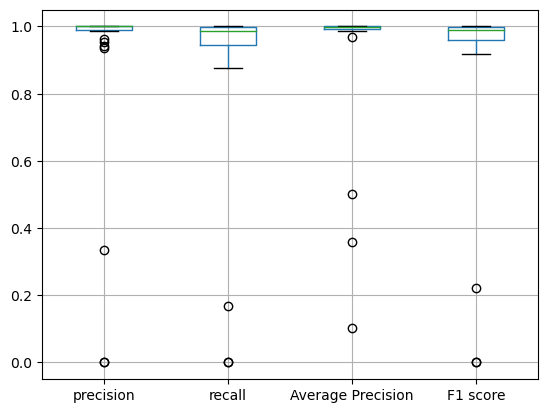

In [96]:
report_NMF.boxplot()

<AxesSubplot:>

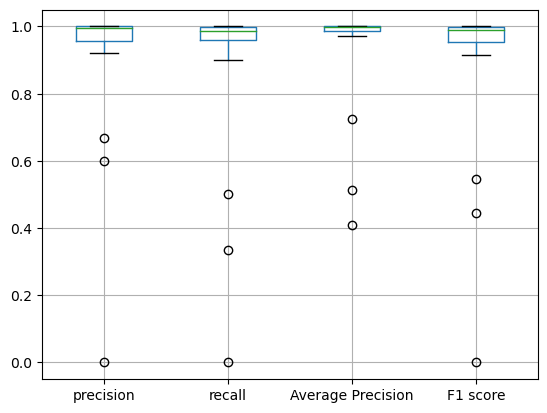

In [97]:
report_AP.boxplot()

<AxesSubplot:>

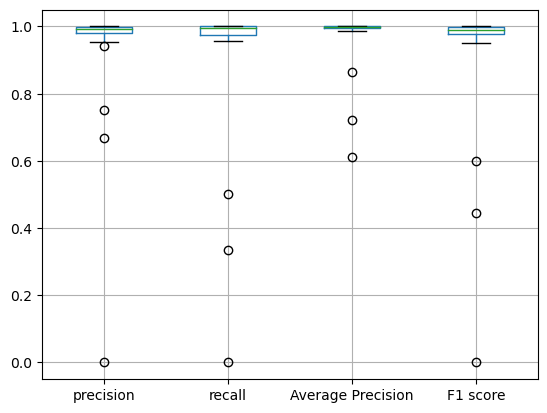

In [98]:
report_PCA.boxplot()

In [99]:
report_NMF.mean()

precision            0.902675
recall               0.883579
Average Precision    0.928946
F1 score             0.891906
dtype: float64

In [100]:
report_AP.mean()

precision            0.928728
recall               0.908708
Average Precision    0.950493
F1 score             0.916546
dtype: float64

In [101]:
report_PCA.mean()

precision            0.937209
recall               0.918022
Average Precision    0.971104
F1 score             0.924877
dtype: float64